In [12]:
#Problem 1

In [13]:
"""
Python code is delivered. The basic idea is to integrate L(t).
And then construct an approximate PDF by looking at small intervals 
P(X==x) ~= P(x-d < X < x+d) where d is very small.
"""

'\nPython code is delivered. The basic idea is to integrate L(t).\nAnd then construct an approximate PDF by looking at small intervals \nP(X==x) ~= P(x-d < X < x+d) where d is very small.\n'

The integral of $t^3$ is $t^4/4 + C$

When evaluated from 0 to x you have

$x^4/4$

So

$P(X \ge x) = exp(-x^4/4)$

In [14]:
import pandas as pd
import numpy as np

np.random.seed(0)
e =  np.exp(1)
print(e)


2.718281828459045


In [15]:
print(e**(-(1.29**4)/4))

0.5004201654701564


In [16]:
# general pdf lookup table 
# x_array are possible rv draws
# p_greater is the CDF approximation
x_array = np.linspace(0, 5, num=300) 
p_greater = np.exp(-(x_array**4)/4)

In [17]:
p_greater[0:5]

array([1.        , 0.99999998, 0.99999969, 0.99999842, 0.999995  ])

In [18]:
x_array[0:5]

array([0.        , 0.01672241, 0.03344482, 0.05016722, 0.06688963])

In [19]:
def get_rv(unif_val):
    """
    Approximate PDF using CDF and intervals.
    """
    for j in range(len(p_greater)-1):
        if unif_val <= p_greater[j] and unif_val >= p_greater[j+1]:
            return x_array[j]
    return np.nan
    


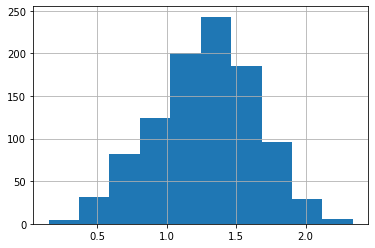

In [20]:
u_rv = np.random.uniform(0,1,1000)
haz_rv = [get_rv(x) for x in u_rv]
pd.Series(haz_rv).hist()

In [21]:
#Problem 2

In [22]:
#a

$X_n$ follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly k successes in n independent Bernoulli trials

Mean of Xn is np because there are n independent Bernoulli trials with parameter p which is the mean of the trial.

Variance of Xn is np(1-p) because there are n independent Bernoulli trials where the variance of each trial is p(1-p). 

For the next question part b) notice that via E(nx) = nE(x) so E(X/n) = E(x)/n = np / n = p

 notice that via V(x/n) = V(x)/n^2 so  np(1-p)/n^2 = p(1-p)/n where p(1-p) is maximized at p = 1/2

In [23]:
#b

This follows directly from Chebyshev's inequality given the sample mean of n Bernoulli trials:


$
    \Pr(|X-\mu|\geq k\sigma) \leq \frac{1}{k^2}
$

where the max variance of a Bernoulli RV is when p = 1/2 so p(1-p) = 1/4


$
    \Pr(|X-\mu|\geq \epsilon) \leq \frac{\sigma^2}{\epsilon^2}
$

So we can bound the RHS using 1/4n

$ \sigma^2 = \frac{1}{4n}$

Which proves this bound using the mean and variance of n Bernoulli trials

$
    \Pr(|X_{n}/n-p|\geq \epsilon) \leq \frac{1}{4n\epsilon^2}
$


---------------------------------------------------------


Alternatively using the above we can go the other way

$
    \Pr(|X-\mu|\geq k\sigma) \leq \frac{1}{k^2}
$

With
$ \frac{1}{4n\epsilon^2} =  \frac{1}{k^2}$

So

$ k = 2\epsilon  \sqrt{n} $

So given our example

$ \epsilon = 2\epsilon  \sqrt{n} \sigma $


$ \sigma = \frac{1}{2\sqrt{n}}$

$ \sigma^2 = \frac{1}{4n}$

We know max var is 1/4n given the variance is maximized at p = 1/2 

In [24]:
#c

$\epsilon = 1/100$

$
    \Pr(|X/n-p|\geq 0.01) \leq \frac{1}{4n\epsilon^2}
$

$
    \Pr(|X/n-p|\lt 0.01) \gt \frac{1}{4n\epsilon^2}
$

$
 1-0.95 = 0.05 \gt \frac{1}{4n\epsilon^2}
$

$
 n \gt \frac{100}{5} \frac{1}{4*(1/100)^2}
$

$
 n \gt 50000
$



In [25]:
1/(4*50000*0.01**2)

0.05

In [26]:
1/(4*60000*0.01**2)

0.041666666666666664

In [28]:
# Increasing sample size reduces sample variance. 

In [29]:
#Problem 3

In [30]:
np.random.seed(1)


def markov(prior_x):
    # given prior_x, randomly pick next x
    if prior_x == 1:
        return np.random.choice([1,2,3], 1, p=[0.4, 0.38, 0.22])[0]
    elif prior_x == 2:
        return np.random.choice([1,2,3], 1, p=[0.12, 0.7, 0.18])[0]
    else: #prior_x == 3:
        return np.random.choice([1,2,3], 1, p=[0.2, 0.5, 0.3])[0]

output_list = []
n = 0
x = 1
while n < 100:
    n += 1
    output_list.append(x)
    x = markov(x)

len(output_list)

100

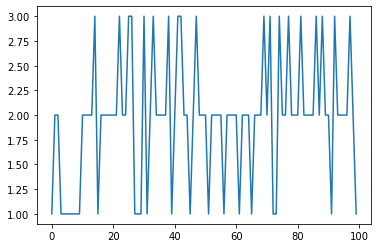

In [31]:
pd.Series(output_list).plot()

In [32]:
#b

In [33]:
np.random.seed(0)
output_list = []
n = 0
x = 1
while n < 1000:
    n += 1
    output_list.append(x)
    x = markov(x)

print(n)
x_array = np.array(output_list)

1000


In [34]:
# 2.024 for single realization for b part 1
print((1/n)*sum(x_array))
print(np.mean(x_array))

2.024
2.024


In [35]:
# 43.64761954775828 for single realization for b part 2
x2_array = x_array*x_array
b0 = [0.9]*1000
b1 = [j**i for i,j in enumerate(b0)]
bk_array = np.array(b1)
print(np.sum(x2_array*bk_array))

43.64761954775828


In [36]:
#c

In [37]:
np.random.seed(0)


b0 = [0.9]*1000
b1 = [j**i for i,j in enumerate(b0)]
BK = np.array(b1)


def get_expected_x(m_trials):
    trials_list1 = []
    trials_list2 = []
    for j in range(m_trials):
        output_list = []
        n = 0
        x = 1
        while n < 1000:
            n += 1
            output_list.append(x)
            x = markov(x)
        x = np.array(x)
        x2 = x*x
        trials_list1.append(np.mean(x))
        trials_list2.append(np.sum(x2*BK))
        
    return np.mean(trials_list1), np.mean(trials_list2)


e1,e2  = get_expected_x(300)
print(e1,e2)
# answers
# 2.0533333333333332 
# 46.20000000000001

2.0533333333333332 46.20000000000001
